<a href="https://colab.research.google.com/github/Tej-55/Visualizing-Filters-of-a-CNN/blob/main/Visualizing_Filters_of_a_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

print('Tensorflow version', tf.__version__)

Tensorflow version 2.12.0


# Model

In [2]:
#Downloading the Model
model = tf.keras.applications.vgg16.VGG16(
    include_top = False, weights="imagenet",
    input_shape = (96, 96, 3)
)
model.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                              

In [3]:
#Get Layer Output
def get_submodel(model, layer_name):
  return tf.keras.models.Model(
      model.input,
      model.get_layer(layer_name).output
  )

get_submodel(model, 'block2_conv2').summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                                 
Total params: 260,160
Trainable params: 260,160
Non-trainable

## Image Visualization

In [4]:
def create_image():
  return tf.random.uniform((96, 96, 3))

def plot_image(image, title='image'):
  image = image - tf.math.reduce_min(image)
  image = image / tf.math.reduce_max(image)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.title(title)
  plt.show()

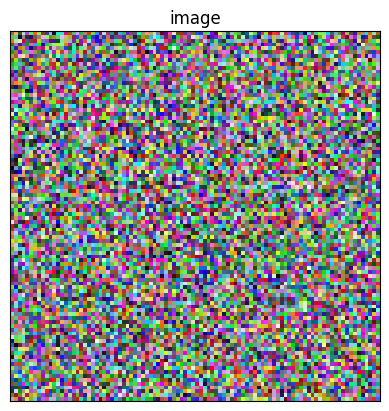

In [5]:
image = create_image()
plot_image(image)

In [6]:
# Training Loop
def visualize_filter(model, layer_name, f_index=None, iters=50):
  submodel = get_submodel(model, layer_name)
  num_filters = submodel.output.shape[-1]

  if f_index is None:
    f_index = random.randint(0, num_filters - 1)
  assert num_filters > f_index

  image = create_image()
  verbose_step = int(iters / 10)

  for i in range(iters):
    with tf.GradientTape() as tape:
      tape.watch(image)
      out = submodel(tf.expand_dims(image, axis=0))[:,:,:,f_index]
      loss = tf.math.reduce_mean(out)
    grads = tape.gradient(loss, image)
    grads = tf.math.l2_normalize(grads)
    image += grads * 10

    if (i+1) % verbose_step == 0:
      print(f'Iteration: {i+1}, Loss: {loss.numpy():.4f}')

  plot_image(image, f'{layer_name}, {f_index}')

#Final Results

In [7]:
print([layer.name for layer in model.layers if 'conv' in layer.name])

['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']


Iteration: 10, Loss: 79.7154
Iteration: 20, Loss: 148.5108
Iteration: 30, Loss: 229.4283
Iteration: 40, Loss: 324.6370
Iteration: 50, Loss: 429.4951
Iteration: 60, Loss: 538.3984
Iteration: 70, Loss: 649.8246
Iteration: 80, Loss: 762.7648
Iteration: 90, Loss: 876.7562
Iteration: 100, Loss: 991.4777


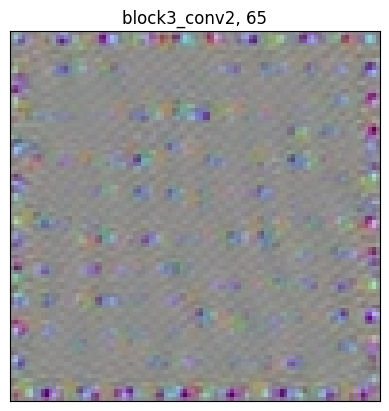

In [11]:
layer_name = "block3_conv2" #@param ['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']
visualize_filter(model, layer_name, f_index = None, iters=100)